# House grouping system project

#### We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.



## Step 1

In [2]:
import pandas as pd

total_data = pd.read_csv("../data/raw/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### Relevant Columns: Rainfall, Depth to water, temperature and volume

In [3]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


### Dividing dataset into train and test

In [4]:
from sklearn.model_selection import train_test_split

#(80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


## Step 2

In [5]:
from sklearn.cluster import KMeans

# Build and train the K-Means model
kmeans_model = KMeans(n_clusters=6, random_state=42)
kmeans_model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

### Add clusters

In [ ]:
X_train["cluster"] = kmeans_model.labels_
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


### Plot results

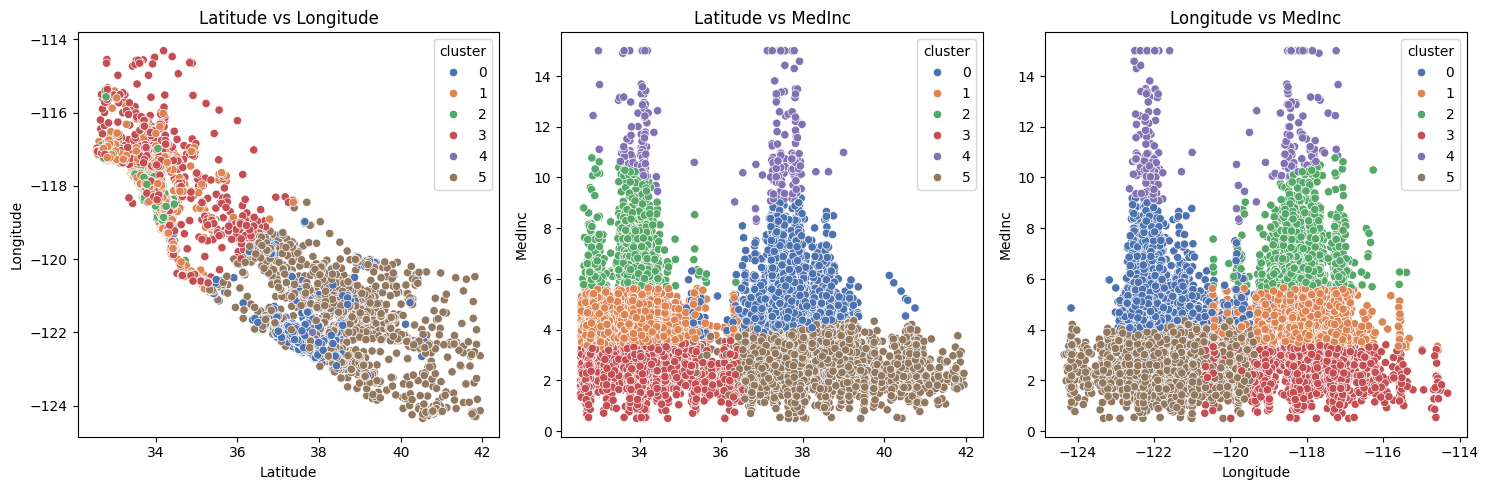

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

#Latitude vs Longitude
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep")
axis[0].set_title("Latitude vs Longitude")

#Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep")
axis[1].set_title("Latitude vs MedInc")

#Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep")
axis[2].set_title("Longitude vs MedInc")

plt.tight_layout()
plt.show()

## Step 3

In [8]:
X_test["cluster"] = kmeans_model.predict(X_test)
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


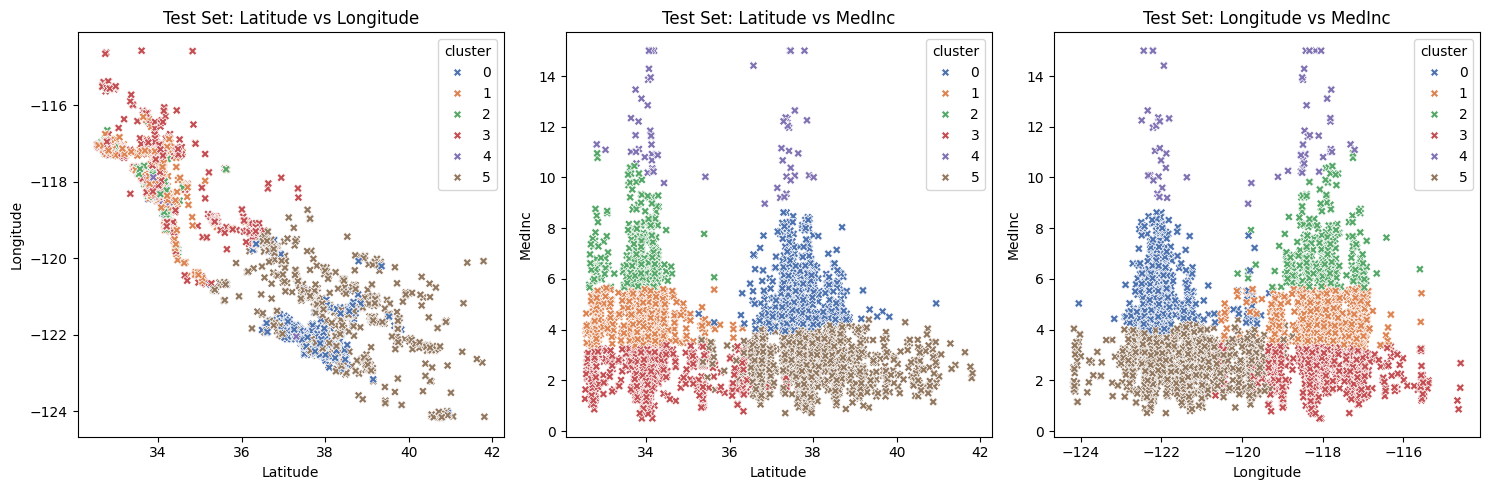

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Plot Latitude vs Longitude
sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", palette="deep", marker="X")
axis[0].set_title("Test Set: Latitude vs Longitude")

# Plot Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", palette="deep", marker="X")
axis[1].set_title("Test Set: Latitude vs MedInc")

# Plot Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", palette="deep", marker="X")
axis[2].set_title("Test Set: Longitude vs MedInc")

plt.tight_layout()
plt.show()

## Step 4

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the features and target variable for training
features = ["MedInc", "Latitude", "Longitude"]
X_train_features = X_train[features]
y_train = X_train["cluster"]

X_test_features = X_test[features]
y_test = X_test["cluster"]

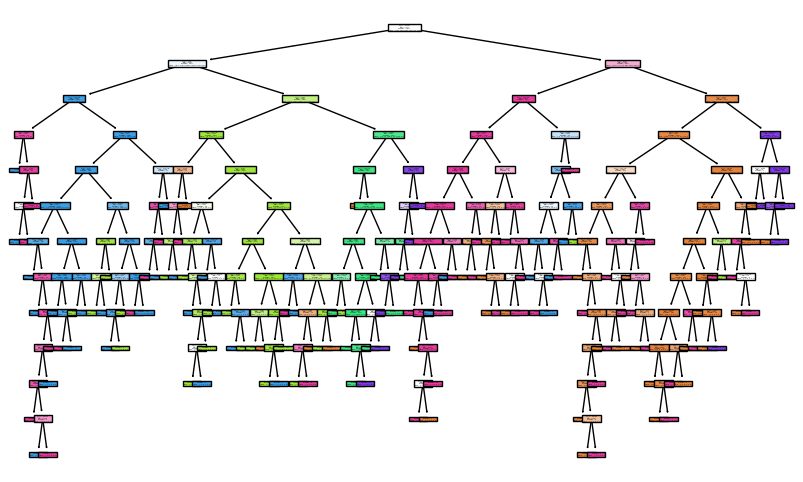

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_features, y_train)

# Visualize the trained Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(decision_tree, filled=True)
plt.show()

In [13]:
#Predict
y_pred = decision_tree.predict(X_test_features)

#Model evaluations
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9951550387596899


## Save models!

In [ ]:
import os
from pickle import dump

os.makedirs("models", exist_ok=True)

dump(kmeans_model, open("models/kmeans_model.sav", "wb"))

dump(decision_tree, open("models/decision_tree_model.sav", "wb"))

print("Models saved successfully!")

Models saved successfully!
